In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Import data
col_names=['Pregnant','Glucose','BP','Skin','Insulin','BMI','Pedigree','Age','Label']
Diabetes=pd.read_csv('E:/DSS/gilthub projects/11-knn and LR/diabetes_data.data',header=None,names=col_names)
Diabetes

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data set discription

In [3]:
Diabetes.size

6912

In [4]:
Diabetes.shape

(768, 9)

In [5]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pregnant  768 non-null    int64  
 1   Glucose   768 non-null    int64  
 2   BP        768 non-null    int64  
 3   Skin      768 non-null    int64  
 4   Insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   Pedigree  768 non-null    float64
 7   Age       768 non-null    int64  
 8   Label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
Diabetes.isnull().sum()

Pregnant    0
Glucose     0
BP          0
Skin        0
Insulin     0
BMI         0
Pedigree    0
Age         0
Label       0
dtype: int64

In [9]:
Diabetes.columns

Index(['Pregnant', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree',
       'Age', 'Label'],
      dtype='object')

In [10]:
Diabetes.dtypes

Pregnant      int64
Glucose       int64
BP            int64
Skin          int64
Insulin       int64
BMI         float64
Pedigree    float64
Age           int64
Label         int64
dtype: object

In [13]:
Diabetes.describe()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
features=['Pregnant', 'Insulin', 'BMI', 'Age']

# Define x and y variables

In [19]:
x=Diabetes[features]
y=Diabetes.Label

In [20]:
x

,Pregnant,Insulin,BMI,Age
0,6,0,33.6,50
1,1,0,26.6,31
2,8,0,23.3,32
3,1,94,28.1,21
4,0,168,43.1,33
...,...,...,...,...
763,10,180,32.9,63
764,2,0,36.8,27
765,5,112,26.2,30
766,1,0,30.1,47


In [21]:
y # Target variable

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Label, Length: 768, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=1)
x_train

,Pregnant,Insulin,BMI,Age
88,15,110,37.1,43
467,0,100,36.8,25
550,1,0,27.4,21
147,2,119,30.5,34
481,0,0,35.2,29
...,...,...,...,...
645,2,440,39.4,30
715,7,392,33.9,34
72,13,0,43.4,42
235,4,0,43.6,26


In [24]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Model prediction

In [26]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

# Model evaluation

In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred_class))
print(accuracy_score(y_test,y_pred_class))
print(metrics.confusion_matrix(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       146
           1       0.66      0.41      0.51        85

    accuracy                           0.71       231
   macro avg       0.69      0.64      0.65       231
weighted avg       0.70      0.71      0.69       231

0.7056277056277056
[[128  18]
 [ 50  35]]


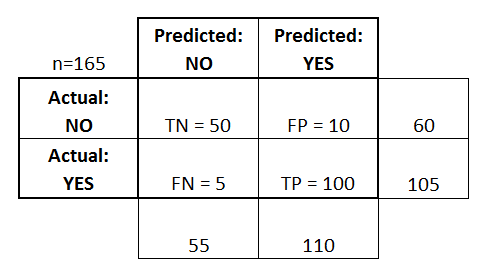

In [31]:
from IPython.display import Image
Image(filename="E:/DSS/gilthub projects/11-knn and LR/confusion_matrix2.png")

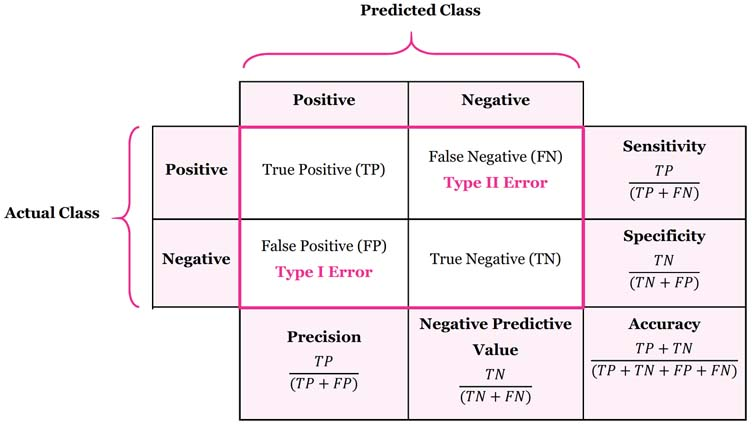

In [33]:
from IPython.display import Image
Image(filename="E:/DSS/gilthub projects/11-knn and LR/confusionMatrxiUpdated.jpg")

In [30]:
# Print first 30 predicted responces
print('True',y_test.values[0:30])
print('False',y_pred_class[0:30])

True [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1]
False [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


# Define confusion matrix variables

In [32]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[128  18]
 [ 50  35]]


# Computations of confusion matrices

In [34]:
# Accuracy computation
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7056277056277056
0.7056277056277056


In [35]:
# Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.2943722943722944
0.2943722943722944


In [36]:
# Sicitivity calculation
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.4117647058823529
0.4117647058823529


In [37]:
# Specificity calculation
specificity = TN / (TN + FP)
print(specificity)

0.8767123287671232


In [38]:
# False positive rate
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.1232876712328767
0.12328767123287676


In [39]:
# Precession calculation
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.660377358490566
0.660377358490566


# Clasification threshold

In [40]:
model.predict(x_test)[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [41]:
# Predicted probability
model.predict_proba(x_test)[0:10]

array([[0.5910505 , 0.4089495 ],
       [0.88678885, 0.11321115],
       [0.83538166, 0.16461834],
       [0.5863486 , 0.4136514 ],
       [0.65946539, 0.34053461],
       [0.72530693, 0.27469307],
       [0.68784756, 0.31215244],
       [0.90311587, 0.09688413],
       [0.66674808, 0.33325192],
       [0.60398163, 0.39601837]])

# Class member predicted probabilities

In [42]:
model.predict_proba(x_test)[0:20, 1]

array([0.4089495 , 0.11321115, 0.16461834, 0.4136514 , 0.34053461,
       0.27469307, 0.31215244, 0.09688413, 0.33325192, 0.39601837,
       0.37542226, 0.18963532, 0.73928844, 0.69725235, 0.01259693,
       0.45674922, 0.32251817, 0.31110458, 0.0904705 , 0.2749878 ])

In [44]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred_prob

array([0.4089495 , 0.11321115, 0.16461834, 0.4136514 , 0.34053461,
       0.27469307, 0.31215244, 0.09688413, 0.33325192, 0.39601837,
       0.37542226, 0.18963532, 0.73928844, 0.69725235, 0.01259693,
       0.45674922, 0.32251817, 0.31110458, 0.0904705 , 0.2749878 ,
       0.36536223, 0.23783569, 0.82480735, 0.33926795, 0.17024119,
       0.44590085, 0.42084563, 0.33040975, 0.19024146, 0.20231357,
       0.38158701, 0.25893228, 0.09941666, 0.65909185, 0.15615477,
       0.72243734, 0.1492297 , 0.27374937, 0.39359553, 0.76551162,
       0.35405315, 0.15497007, 0.14048678, 0.26362488, 0.11570463,
       0.06112944, 0.64811387, 0.26763864, 0.17344835, 0.26947355,
       0.01248592, 0.2620239 , 0.45126381, 0.10564062, 0.79223885,
       0.21277117, 0.23451126, 0.36194267, 0.64903378, 0.48002483,
       0.72078746, 0.01207957, 0.73781995, 0.40024788, 0.61292643,
       0.16907123, 0.52492035, 0.45152098, 0.60317407, 0.57502986,
       0.6738502 , 0.63117784, 0.49444479, 0.11275871, 0.45064

# Predicted probability plot

Text(0, 0.5, 'Frequency')

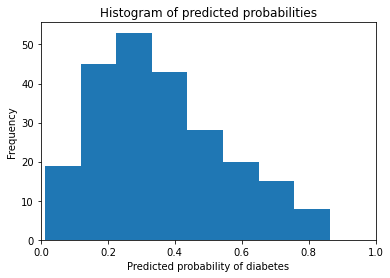

In [45]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

# ROC curve 

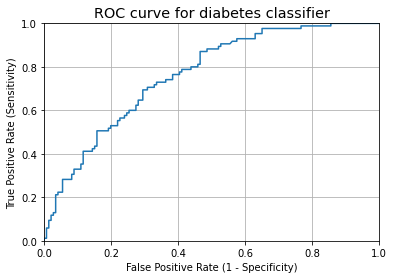

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [47]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [48]:
evaluate_threshold(0.5)

Sensitivity: 0.4117647058823529
Specificity: 0.8835616438356164


In [49]:
evaluate_threshold(0.3)

Sensitivity: 0.788235294117647
Specificity: 0.589041095890411


# End